In [4]:
#importing the packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot

In [5]:
data = pd.read_csv('downloads/Data Science/Data Mining/train_ctrUa4K.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data = data.sample(n=550, random_state = 26)

In [11]:
data.to_csv('Tomisin_2220826.csv')

In [8]:
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(), inplace = True)

In [12]:
data = pd.read_csv('Tomisin_2220826.csv')

In [13]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,324,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
1,278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
2,523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
3,410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
4,339,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y


In [14]:
data=data.drop('Unnamed: 0', axis = 1)


In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
1,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
2,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
3,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
4,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y


## 1) Question 1

In [16]:
# Question 1A
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,530.000000,538.000000,506.000000
mean,5381.370909,1644.310764,147.609434,341.888476,0.849802
std,6071.518796,3037.730110,87.449236,65.727632,0.357619
min,210.000000,0.000000,9.000000,12.000000,0.000000
25%,2894.250000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,128.000000,360.000000,1.000000
75%,5811.250000,2332.250000,169.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
#question1B
print(data.size)

7150


In [18]:
#Question 1Cprint(baseball_df.head())
print(data.shape)

(550, 13)


In [19]:
#Question 1D
print(data.ndim)

2


## Answer to Question 1A,B,C&d

1A. The function 'Data.describe' gives a descriptive analysis of the features with numeric values in our dataframe. In this dataset, there are 5 features that have numeric values. Therefore, each  features have been described individually to know our data better. we have our five number summary; the mean(which is  the sum of all values divided by the total number of values), the Minimum(which is the lowest value), the 25%(which is our first Quartile),we have 50% which is our median, and we have our maximum value for all the features that have numeric values.

1B. 'data.size' is a function used to know/see the amount of cells that are in our dataset. In this dataset, there are 7150 celles/values. 

1C. The command 'data.shape' shows the amount of information we have in our data. In this dataframe, there are 550 rows and 13 column.
1D. 'data.ndim' is a function to know the dimension of the dataset. In this dataset, we have 2 dimensions. 

## Question 2 Answer
There are quite a few diffences between the original and the new datasets. The columns still remains 15 while we now have 550 rows as opposed to 614 rows that are present in the original data. Also, we can notice some diffences in the figues in our 5 number summary. While there are visible changes most of these features (Min, 25%,std,50%,max,etc)  from the old and new dataset, the only feature that did not change when a descriptive analysis of the data is done is the 'credit History' which has a value of 0 and 1 all through.
Also, there is a change in the size of our data. The initial data has a size of 7982 while the new data has 7150 has its size. However, the dimension(data.ndim) of the data still remains 2.

## Question 3 Answer

## Data Analysis

In [20]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
1,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
2,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
3,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
4,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y


## Question 4

<AxesSubplot:>

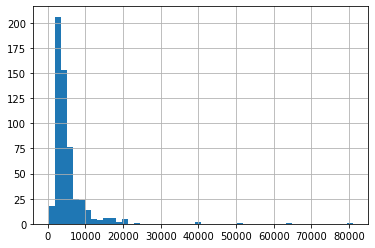

In [22]:
data['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

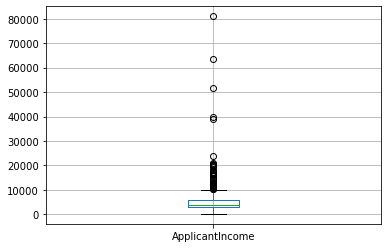

In [23]:
data.boxplot(column='ApplicantIncome')

## Question 4A

outliers are values that do not fit the other values in our data. Sometimes, they are regarded as abnormal samples in our data population. It is therfore dependent on the data scientist to decide to remove or include the outliers in the data based on their importance. 

The above diagrams show the hitogram and boxplot of our applicant income feature and agreeably,we would notice some outliers in our data. From our boxplot, it shows that the values from 10000 above are outliers. Also, from our histogram, we would notice that the values after 10000 do not follow a normal distribution. Therefore, these are the outliers in our dataset. Inaddition, we would notice that the outliers in this data are quite a lot. Therefore, there is a problem with the 'applicant income' feature that needs to be looked into. 

## question 4B

## Visualization ofLoan Amount 

<AxesSubplot:>

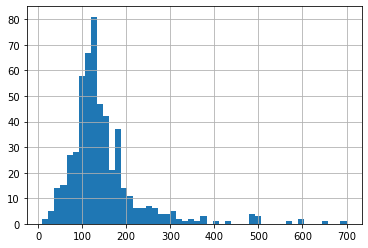

In [24]:
data['LoanAmount'].hist(bins=50)

## Comparisms between The two visualizations

In [25]:
data['Credit_History'].value_counts()

1.0    430
0.0     76
Name: Credit_History, dtype: int64

In [26]:
credit_history = data['Credit_History'].value_counts(ascending=True)
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
 aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)


Frequency Table for Credit History:
0.0     76
1.0    430
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.065789
1.0                0.800000


In [27]:
data['Loan_Status'].value_counts()

Y    381
N    169
Name: Loan_Status, dtype: int64

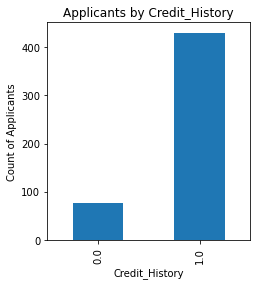

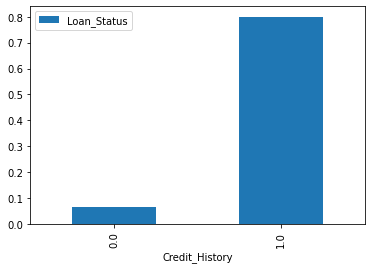

In [28]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()

In [29]:
data['Gender'].value_counts()

Male      436
Female    101
Name: Gender, dtype: int64

In [30]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
1,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
2,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
3,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
4,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y


In [33]:
data.shape

(550, 13)

In [34]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,538.000000,506.000000
mean,5381.370909,1644.310764,147.609434,341.888476,0.849802
std,6071.518796,3037.730110,85.841576,65.727632,0.357619
min,210.000000,0.000000,9.000000,12.000000,0.000000
25%,2894.250000,0.000000,102.250000,360.000000,1.000000
50%,3848.000000,1149.000000,130.000000,360.000000,1.000000
75%,5811.250000,2332.250000,165.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


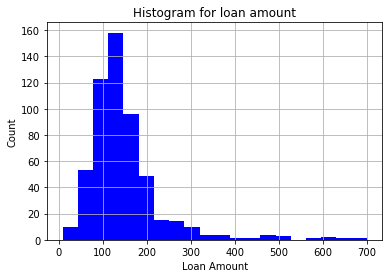

In [35]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

In [36]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
#data['LoanAmount_log'].hist(bins = 20)

<AxesSubplot:>

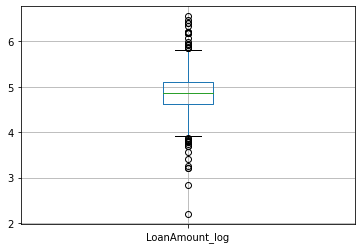

In [37]:
data.boxplot(column='LoanAmount_log')

In [38]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y,5.703782
1,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y,6.077642
2,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y,6.173786
3,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N,4.127134
4,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y,4.262680


In [39]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,538.000000,506.000000,550.000000
mean,5381.370909,1644.310764,147.609434,341.888476,0.849802,4.868164
std,6071.518796,3037.730110,85.841576,65.727632,0.357619,0.500279
min,210.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2894.250000,0.000000,102.250000,360.000000,1.000000,4.627412
50%,3848.000000,1149.000000,130.000000,360.000000,1.000000,4.867534
75%,5811.250000,2332.250000,165.750000,360.000000,1.000000,5.110477
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


In [40]:
data = data.drop(['LoanAmount'], axis=1) 

In [42]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,360.0,1.0,Rural,Y,5.703782
1,LP001907,Male,Yes,0,Graduate,No,14583,0.0,360.0,1.0,Semiurban,Y,6.077642
2,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,360.0,1.0,Rural,Y,6.173786
3,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,360.0,1.0,Semiurban,N,4.127134
4,LP002114,Female,No,0,Graduate,No,4160,0.0,360.0,1.0,Semiurban,Y,4.262680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,180.0,1.0,Urban,N,4.994570
546,LP001120,Male,No,0,Graduate,No,1800,1213.0,360.0,1.0,Urban,Y,3.850148
547,LP001114,Male,No,0,Graduate,No,4166,7210.0,360.0,1.0,Urban,Y,5.214936
548,LP001310,Male,Yes,0,Graduate,No,5695,4167.0,360.0,1.0,Semiurban,Y,5.164786


## Dealing with missing values

In [43]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [44]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

## Q5. Use LabelEncoder, to convert categorical variables into numeric. Hint: You will first need to identify categorial values.

In [45]:
columns = list(data)
print(columns)


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log']


In [46]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
dtype: object

In [9]:
data.shape

(550, 13)

In [47]:
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']


In [48]:
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [1]:
le = LabelEncoder()
for i in columns:
 #print(i)
 data[i] = le.fit_transform(data[i])


NameError: name 'LabelEncoder' is not defined

In [50]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


## Normalization

In [51]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


In [52]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


In [53]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


In [54]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)

In [55]:
normalized_data = normalize( data_for_norm )

In [56]:
print(normalized_data[0:5])

[[6.66474684e-05 6.66474684e-05 1.99942405e-04 0.00000000e+00
  0.00000000e+00 9.99712025e-01 0.00000000e+00 2.39930886e-02
  6.66474684e-05 0.00000000e+00 3.80142662e-04]
 [6.85521043e-05 6.85521043e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.99695337e-01 0.00000000e+00 2.46787575e-02
  6.85521043e-05 6.85521043e-05 4.16635165e-04]
 [9.33919321e-05 9.33919321e-05 1.86783864e-04 0.00000000e+00
  9.33919321e-05 7.42279076e-01 6.69246586e-01 3.36210956e-02
  9.33919321e-05 0.00000000e+00 5.76581813e-04]
 [0.00000000e+00 0.00000000e+00 2.57484836e-04 2.57484836e-04
  2.57484836e-04 9.95693859e-01 0.00000000e+00 9.26945408e-02
  2.57484836e-04 2.57484836e-04 1.06267452e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.96275872e-01 0.00000000e+00 8.62161812e-02
  2.39489392e-04 2.39489392e-04 1.02086661e-03]]


In [57]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)


In [58]:
normalized_data .head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0.000067,0.000067,0.000200,0.000000,0.000000,0.999712,0.000000,0.023993,0.000067,0.000000,0.000380
1,0.000069,0.000069,0.000000,0.000000,0.000000,0.999695,0.000000,0.024679,0.000069,0.000069,0.000417
2,0.000093,0.000093,0.000187,0.000000,0.000093,0.742279,0.669247,0.033621,0.000093,0.000000,0.000577
3,0.000000,0.000000,0.000257,0.000257,0.000257,0.995694,0.000000,0.092695,0.000257,0.000257,0.001063
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.996276,0.000000,0.086216,0.000239,0.000239,0.001021


In [59]:
normalized_data['Loan_ID'] = data['Loan_ID']

In [60]:
normalized_data['Loan_Status'] = data['Loan_Status']

In [61]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000067,0.000067,0.000200,0.000000,0.000000,0.999712,0.000000,0.023993,0.000067,0.000000,0.000380,LP002065,1
1,0.000069,0.000069,0.000000,0.000000,0.000000,0.999695,0.000000,0.024679,0.000069,0.000069,0.000417,LP001907,1
2,0.000093,0.000093,0.000187,0.000000,0.000093,0.742279,0.669247,0.033621,0.000093,0.000000,0.000577,LP002693,1
3,0.000000,0.000000,0.000257,0.000257,0.000257,0.995694,0.000000,0.092695,0.000257,0.000257,0.001063,LP002318,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.996276,0.000000,0.086216,0.000239,0.000239,0.001021,LP002114,1


In [62]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000179,0.000145,0.000161,0.000059,0.000048,0.878307,0.303848,0.077720,0.000194,0.000242,0.001070,0.692727
std,0.000122,0.000130,0.000251,0.000120,0.000125,0.171642,0.315491,0.038120,0.000120,0.000235,0.000420,0.461783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.009983,0.000000,0.002207,0.000000,0.000000,0.000073,0.000000
25%,0.000090,0.000000,0.000000,0.000000,0.000000,0.801280,0.000000,0.049099,0.000111,0.000000,0.000786,0.000000
50%,0.000188,0.000153,0.000000,0.000000,0.000000,0.968444,0.235717,0.076477,0.000204,0.000214,0.001068,1.000000
75%,0.000265,0.000251,0.000276,0.000000,0.000000,0.997304,0.590119,0.102131,0.000276,0.000368,0.001344,1.000000
max,0.000673,0.000589,0.001609,0.000673,0.000780,0.999996,0.999941,0.242218,0.000673,0.001346,0.002678,1.000000


## Building a Decision Tree classifier using sklearn

In [63]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'Loan_ID',
 'Loan_Status']

In [64]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000067,0.000067,0.000200,0.000000,0.000000,0.999712,0.000000,0.023993,0.000067,0.000000,0.000380,LP002065,1
1,0.000069,0.000069,0.000000,0.000000,0.000000,0.999695,0.000000,0.024679,0.000069,0.000069,0.000417,LP001907,1
2,0.000093,0.000093,0.000187,0.000000,0.000093,0.742279,0.669247,0.033621,0.000093,0.000000,0.000577,LP002693,1
3,0.000000,0.000000,0.000257,0.000257,0.000257,0.995694,0.000000,0.092695,0.000257,0.000257,0.001063,LP002318,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.996276,0.000000,0.086216,0.000239,0.000239,0.001021,LP002114,1


In [65]:
features = normalized_data.drop(['Loan_ID','Loan_Status'], axis = 1)
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [66]:
print('Features:')
print(features.head())
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000067  0.000067    0.000200   0.000000       0.000000         0.999712   
1  0.000069  0.000069    0.000000   0.000000       0.000000         0.999695   
2  0.000093  0.000093    0.000187   0.000000       0.000093         0.742279   
3  0.000000  0.000000    0.000257   0.000257       0.000257         0.995694   
4  0.000000  0.000000    0.000000   0.000000       0.000000         0.996276   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.000000          0.023993        0.000067       0.000000   
1           0.000000          0.024679        0.000069       0.000069   
2           0.669247          0.033621        0.000093       0.000000   
3           0.000000          0.092695        0.000257       0.000257   
4           0.000000          0.086216        0.000239       0.000239   

   LoanAmount_log  
0        0.000380  
1        0.000417  
2        0

In [67]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000067,0.000067,0.000200,0.000000,0.000000,0.999712,0.000000,0.023993,0.000067,0.000000,0.000380,LP002065,1
1,0.000069,0.000069,0.000000,0.000000,0.000000,0.999695,0.000000,0.024679,0.000069,0.000069,0.000417,LP001907,1
2,0.000093,0.000093,0.000187,0.000000,0.000093,0.742279,0.669247,0.033621,0.000093,0.000000,0.000577,LP002693,1
3,0.000000,0.000000,0.000257,0.000257,0.000257,0.995694,0.000000,0.092695,0.000257,0.000257,0.001063,LP002318,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.996276,0.000000,0.086216,0.000239,0.000239,0.001021,LP002114,1
5,0.000187,0.000187,0.000000,0.000000,0.000187,0.125961,0.989751,0.067279,0.000187,0.000000,0.000958,LP001644,1
6,0.000244,0.000000,0.000000,0.000000,0.000000,0.726014,0.682028,0.087972,0.000244,0.000244,0.001214,LP001744,1
7,0.000295,0.000295,0.000000,0.000000,0.000000,0.896044,0.431035,0.106355,0.000295,0.000591,0.001345,LP002281,1
8,0.000305,0.000000,0.000000,0.000000,0.000000,0.993935,0.000000,0.109962,0.000305,0.000611,0.001195,LP001535,1
9,0.000286,0.000286,0.000572,0.000000,0.000572,0.738590,0.666247,0.102939,0.000286,0.000000,0.001381,LP002128,1


In [68]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33,
 random_state = 26)
print(x_train.shape, x_test.shape)

(368, 11) (182, 11)


In [69]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [70]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.09371
Feature: 1, Score: 0.08382
Feature: 2, Score: 0.03270
Feature: 3, Score: 0.02327
Feature: 4, Score: 0.02457
Feature: 5, Score: 0.09191
Feature: 6, Score: 0.05081
Feature: 7, Score: 0.10033
Feature: 8, Score: 0.31984
Feature: 9, Score: 0.04201
Feature: 10, Score: 0.13703


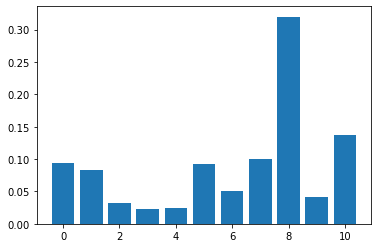

In [71]:
importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [72]:
prediction = dtc_model.predict(x_test) 


In [73]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

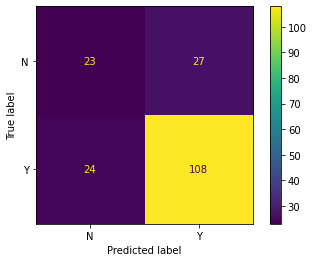

In [74]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()


In [75]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.49      0.46      0.47        50
           Y       0.80      0.82      0.81       132

    accuracy                           0.72       182
   macro avg       0.64      0.64      0.64       182
weighted avg       0.71      0.72      0.72       182



In [76]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


In [77]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


In [78]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002065,1,1,3,0,0,15000,0.0,360.0,1.0,0,1,5.703782
1,LP001907,1,1,0,0,0,14583,0.0,360.0,1.0,1,1,6.077642
2,LP002693,1,1,2,0,1,7948,7166.0,360.0,1.0,0,1,6.173786
3,LP002318,0,0,1,1,1,3867,0.0,360.0,1.0,1,0,4.127134
4,LP002114,0,0,0,0,0,4160,0.0,360.0,1.0,1,1,4.262680


In [2]:
data_for_norm = data.drop(['LoanAmount_log','Loan_Status'], axis=1)

NameError: name 'data' is not defined

In [109]:
normalized = normalize( data_for_norm )

ValueError: could not convert string to float: 'LP002065'